In [3]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import random
import warnings

warnings.filterwarnings("ignore")

In [4]:
#file path to csv
hate_crime_csv = "Resources/hate_crime.csv"
#import csv to dataframe
hate_crime_df = pd.read_csv(hate_crime_csv, low_memory = False)
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [5]:
#filter data to reflect needed info
filtered_df = hate_crime_df[["DATA_YEAR", "REGION_NAME","INCIDENT_DATE","OFFENSE_NAME","BIAS_DESC"]]

filtered_df.head()

,DATA_YEAR,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,BIAS_DESC
0,1991,South,31-AUG-91,Intimidation,Anti-Black or African American
1,1991,South,19-SEP-91,Simple Assault,Anti-White
2,1991,South,04-JUL-91,Aggravated Assault,Anti-Black or African American
3,1991,South,24-DEC-91,Aggravated Assault;Destruction/Damage/Vandalis...,Anti-White
4,1991,South,23-DEC-91,Aggravated Assault,Anti-White


In [6]:
#filter data by year in DataFrames
year_filter = filtered_df[(filtered_df["DATA_YEAR"]>= 2014) & (hate_crime_df["DATA_YEAR"] <= 2018)]

## OFFENSE Crime Rate Based on Quarter for 5 Years

In [7]:
#Determine Quarter for the data 
year_filter["INCIDENT_DATE"] = pd.to_datetime(year_filter["INCIDENT_DATE"])
year_filter['Quarter'] = year_filter['INCIDENT_DATE'].dt.quarter

year_filter.head()

,DATA_YEAR,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,BIAS_DESC,Quarter
169146,2014,West,2014-12-06,Destruction/Damage/Vandalism of Property,Anti-Gay (Male),4
169147,2014,West,2014-07-18,Aggravated Assault,Anti-American Indian or Alaska Native,3
169148,2014,West,2014-07-09,Simple Assault,Anti-Black or African American,3
169149,2014,West,2014-09-26,Robbery,Anti-American Indian or Alaska Native,3
169150,2014,West,2014-09-30,Simple Assault,Anti-American Indian or Alaska Native,3


# Quarter 1 2014-2018

In [8]:
#Seperate all of Quarter 1 
Q1 = year_filter[(year_filter["Quarter"]==1)]

Q1.head()

,DATA_YEAR,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,BIAS_DESC,Quarter
169153,2014,South,2014-03-22,Simple Assault,Anti-Jewish,1
169169,2014,South,2014-02-17,Intimidation,Anti-Black or African American,1
169173,2014,West,2014-01-24,Intimidation,Anti-Black or African American,1
169174,2014,West,2014-01-24,Intimidation,Anti-Gay (Male),1
169175,2014,West,2014-01-28,Simple Assault,Anti-Gay (Male),1


In [9]:
#number of offenses
Q1["OFFENSE_NAME"].value_counts()

Destruction/Damage/Vandalism of Property                                                1925
Intimidation                                                                            1795
Simple Assault                                                                          1422
Aggravated Assault                                                                       687
Burglary/Breaking & Entering                                                             155
                                                                                        ... 
Impersonation;Intimidation                                                                 1
Hacking/Computer Invasion                                                                  1
Burglary/Breaking & Entering;Simple Assault                                                1
Destruction/Damage/Vandalism of Property;Theft of Motor Vehicle Parts or Accessories       1
Destruction/Damage/Vandalism of Property;Motor Vehicle Theft          

In [10]:
sim_offense1 = Q1.replace({
   " Aggravated Assault;All Other":"Aggravated Assualt", "Intimidation;Simple Assault": "Simple Assault"})

In [11]:
counts = sim_offense1["OFFENSE_NAME"].value_counts()

#drop counts of crime less than one percent for a cleaner pie chart
counts = counts.where(counts>100).dropna(how="any")

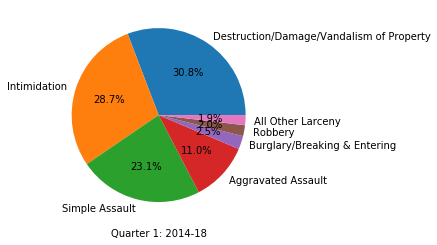

In [12]:
#pie chart for Q1 offense

plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%")
plt.xlabel("Quarter 1: 2014-18")
plt.show()

# Quarter 2 2014-2018

In [13]:
#filter out all of Quarter 2
Q2 = year_filter[(year_filter["Quarter"]==2)]

In [14]:
Q2["OFFENSE_NAME"].value_counts()

Destruction/Damage/Vandalism of Property                   2357
Intimidation                                               2015
Simple Assault                                             1901
Aggravated Assault                                          890
Robbery                                                     173
                                                           ... 
Betting/Wagering                                              1
Simple Assault;Weapon Law Violations                          1
Aggravated Assault;Burglary/Breaking & Entering;Robbery       1
Purchasing Prostitution                                       1
Animal Cruelty                                                1
Name: OFFENSE_NAME, Length: 101, dtype: int64

In [15]:
sim_offense2 = Q2.replace({
   " Aggravated Assault;All Other":"Aggravated Assualt", "Intimidation;Simple Assault": "Simple Assault"})

In [16]:
count2 = sim_offense2["OFFENSE_NAME"].value_counts()

#drop counts of crime less than one percent for a cleaner pie chart
count2 = count2.where(count2>100).dropna(how="any")

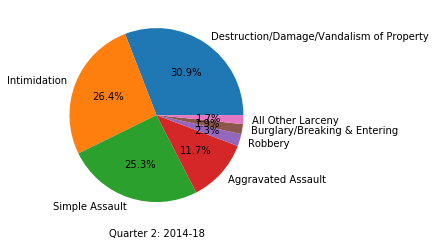

In [17]:
#pie chart for Q2 offense
plt.pie(count2.values, labels=count2.index.values, autopct="%1.1f%%")
plt.xlabel("Quarter 2: 2014-18")
plt.show()

# Quarter 3 2014-2018

In [68]:
#filter out all of Quarter 3
Q3 = year_filter[(year_filter["Quarter"]==3)]

In [19]:
Q3["OFFENSE_NAME"].value_counts()

Destruction/Damage/Vandalism of Property                                                     2331
Intimidation                                                                                 2115
Simple Assault                                                                               1954
Aggravated Assault                                                                            968
All Other Larceny                                                                             159
                                                                                             ... 
Aggravated Assault;Destruction/Damage/Vandalism of Property;Simple Assault                      1
Destruction/Damage/Vandalism of Property;Theft From Building                                    1
Drug Equipment Violations;Drug/Narcotic Violations;Weapon Law Violations                        1
Aggravated Assault;Robbery;Simple Assault                                                       1
Burglary/Breaking & 

In [20]:
sim_offense3 = Q3.replace({
   " Aggravated Assault;All Other":"Aggravated Assualt", "Intimidation;Simple Assault": "Simple Assault"})

In [21]:
count3 = sim_offense3["OFFENSE_NAME"].value_counts()

#drop counts of crime less than one percent for a cleaner pie chart
count3 = count3.where(count3>100).dropna(how="any")

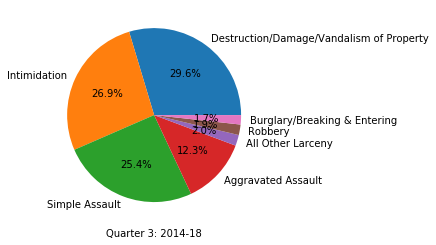

In [22]:
#pie chart for Q3 offense
plt.pie(count3.values, labels=count3.index.values, autopct="%1.1f%%")
plt.xlabel("Quarter 3: 2014-18")
plt.show()

# Quarter 4 2014-2018

In [23]:
#filter out all of Quarter 4
Q4 = year_filter[(year_filter["Quarter"]==4)]

In [24]:
Q4["OFFENSE_NAME"].value_counts()

Destruction/Damage/Vandalism of Property                                                             2412
Intimidation                                                                                         1997
Simple Assault                                                                                       1698
Aggravated Assault                                                                                    733
Robbery                                                                                               145
                                                                                                     ... 
Aggravated Assault;Intimidation;Weapon Law Violations                                                   1
Drug Equipment Violations;Drug/Narcotic Violations;Stolen Property Offenses;Weapon Law Violations       1
Aggravated Assault;Burglary/Breaking & Entering;Destruction/Damage/Vandalism of Property                1
Aggravated Assault;Destruction/Damage/Vandalis

In [25]:
sim_offense4 = Q4.replace({
   " Aggravated Assault;All Other":"Aggravated Assualt", "Intimidation;Simple Assault": "Simple Assault"})

In [26]:
count4 = sim_offense4["OFFENSE_NAME"].value_counts()

#drop counts of crime less than one percent for a cleaner pie chart
count4= count4.where(count4>100).dropna(how="any")

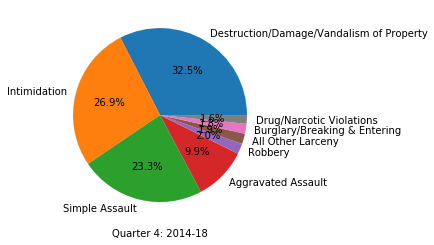

In [27]:
#pie chart for Q3 offense
plt.pie(count4.values, labels=count4.index.values, autopct="%1.1f%%")
plt.xlabel("Quarter 4: 2014-18")
plt.show()

## Bias Description Crime Rate Based on Quarter for 5 Years

In [73]:
bias = Q1["BIAS_DESC"].value_counts()
bias= bias.where(bias>100).dropna(how="any").astype("int")
bias_df = pd.DataFrame(bias)
bias= bias.reset_index()
bias

,index,BIAS_DESC
0,Anti-Black or African American,1901
1,Anti-Jewish,878
2,Anti-Gay (Male),733
3,Anti-White,668
4,Anti-Hispanic or Latino,384
5,Anti-Other Race/Ethnicity/Ancestry,290
6,Anti-Islamic (Muslim),279
7,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",276
8,Anti-American Indian or Alaska Native,192
9,Anti-Asian,162


# Quarter 1 2014 - 2018 

Text(0.5, 1.0, 'Bias Description Crime Rate for Quarter 1 2014-2018')

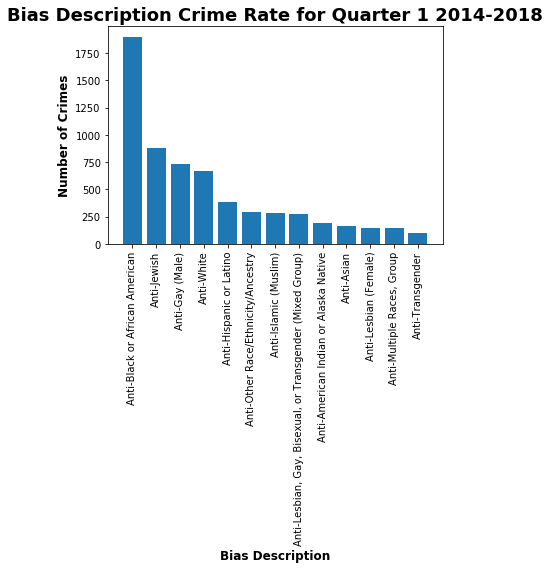

In [125]:
plt.bar(a.index.values, a.values)
plt.xticks(rotation = 90)
plt.xlabel("Bias Description", fontsize = 12, fontweight="bold")
plt.ylabel("Number of Crimes",fontsize = 12, fontweight="bold")
plt.title("Bias Description Crime Rate for Quarter 1 2014-2018", fontsize = 18, fontweight = "bold")

In [127]:
b= Q2["BIAS_DESC"].value_counts()
b
b= b.where(a>100).dropna(how="any").astype("int")


In [128]:
a = Q1["BIAS_DESC"].value_counts()
a
a= a.where(a>100).dropna(how="any").astype("int")
#map("{:}".format)


# Quarter 2 2014-2018 

Text(0.5, 1.0, 'Bias Description Crime Rate for Quarter 2 2014-2018')

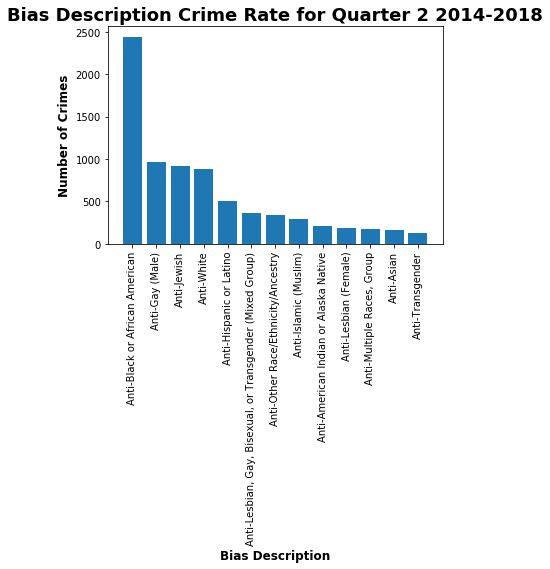

In [121]:
plt.bar(b.index.values, b.values)
plt.xticks(rotation = 90)
plt.xlabel("Bias Description", fontsize = 12, fontweight="bold")
plt.ylabel("Number of Crimes",fontsize = 12, fontweight="bold")
plt.title("Bias Description Crime Rate for Quarter 2 2014-2018", fontsize = 18, fontweight = "bold")

In [123]:
c = Q3["BIAS_DESC"].value_counts()
c
c= c.where(c>100).dropna(how="any").astype("int")

# Quarter 3 2014- 2018 

Text(0.5, 1.0, 'Bias Description Crime Rate for Quarter 3 2014-2018')

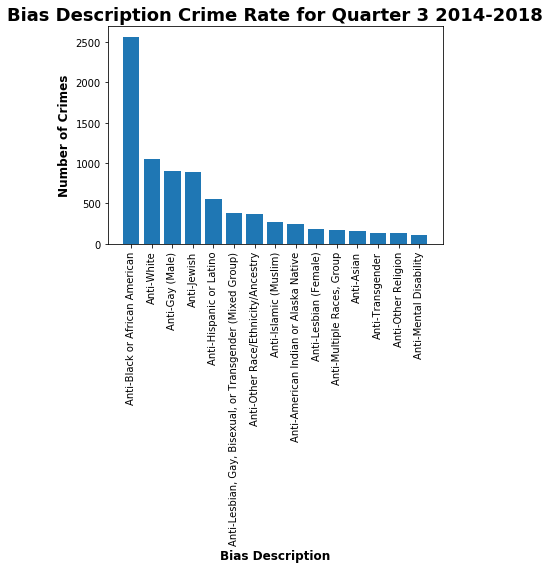

In [124]:
plt.bar(c.index.values, c.values)
plt.xticks(rotation = 90)
plt.xlabel("Bias Description", fontsize = 12, fontweight="bold")
plt.ylabel("Number of Crimes",fontsize = 12, fontweight="bold")
plt.title("Bias Description Crime Rate for Quarter 3 2014-2018", fontsize = 18, fontweight = "bold")

In [88]:
d = Q4["BIAS_DESC"].value_counts()
d
d= d.where(d>100).dropna(how="any").astype("int")

## Quarter 4 2014-2018 

Text(0.5, 1.0, 'Bias Description Crime Rate for Quarter 4 2014-2018')

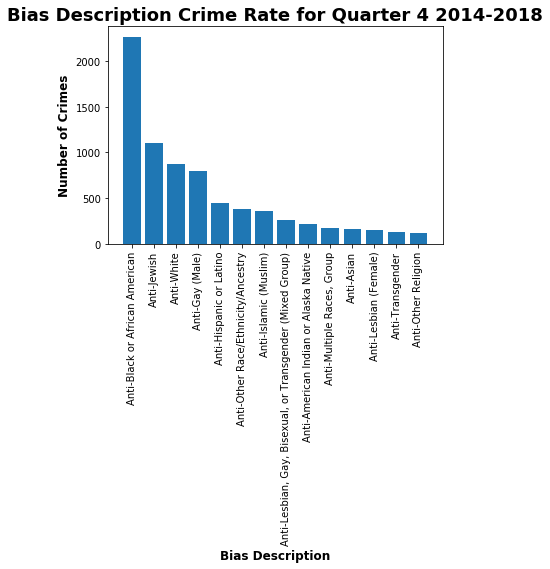

In [126]:
plt.bar(d.index.values, d.values)
plt.xticks(rotation = 90)
plt.xlabel("Bias Description", fontsize = 12, fontweight="bold")
plt.ylabel("Number of Crimes",fontsize = 12, fontweight="bold")
plt.title("Bias Description Crime Rate for Quarter 4 2014-2018", fontsize = 18, fontweight = "bold")

# Region Crime Rate Based On Quarter For 5 Years

In [114]:
south = year_filter[(year_filter["REGION_NAME"]=="South")]
south_data = south["Quarter"].value_counts()
south_data = pd.DataFrame(south_data)
c = south_data.reset_index()
c =  c.sort_values(by = "index")

# SOUTH

Text(0.5, 1.0, 'South Crime Rate')

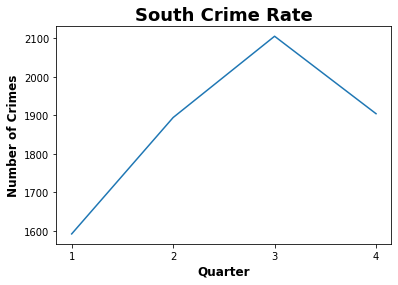

In [117]:
plt.plot(c["index"], c["Quarter"])
plt.xticks(np.arange(1,5, 1))
plt.xlabel("Quarter", fontsize = 12, fontweight="bold")
plt.ylabel("Number of Crimes",fontsize = 12, fontweight="bold")
plt.title("South Crime Rate", fontsize = 18, fontweight = "bold")

## WEST

In [140]:
west = year_filter[(year_filter["REGION_NAME"]=="West")]
west_data = west["Quarter"].value_counts()
west_data = pd.DataFrame(west_data)
W = west_data.reset_index()
W =  W.sort_values(by = "index")

Text(0.5, 1.0, 'West Crime Rate')

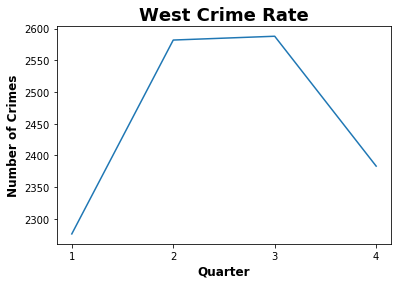

In [141]:
plt.plot(W["index"], W["Quarter"])
plt.xticks(np.arange(1,5, 1))
plt.xlabel("Quarter", fontsize = 12, fontweight="bold")
plt.ylabel("Number of Crimes",fontsize = 12, fontweight="bold")
plt.title("West Crime Rate", fontsize = 18, fontweight = "bold")

# NORTHEAST

In [142]:
NE = year_filter[(year_filter["REGION_NAME"]=="Northeast")]
ne_data = NE["Quarter"].value_counts()
ne_data = pd.DataFrame(ne_data)
northeast= ne_data.reset_index()
northeast=  northeast.sort_values(by = "index")

Text(0.5, 1.0, 'NorthEast Crime Rate')

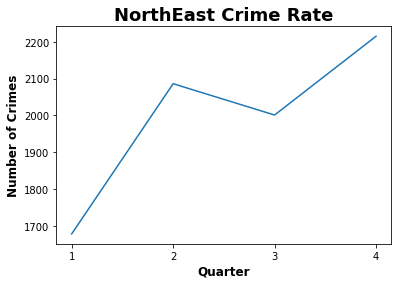

In [143]:
plt.plot(northeast["index"], northeast["Quarter"])
plt.xticks(np.arange(1,5, 1))
plt.xlabel("Quarter", fontsize = 12, fontweight="bold")
plt.ylabel("Number of Crimes",fontsize = 12, fontweight="bold")
plt.title("NorthEast Crime Rate", fontsize = 18, fontweight = "bold")

# MIDWEST

In [144]:
Midwest = year_filter[(year_filter["REGION_NAME"]=="Midwest")]
mw_data = Midwest["Quarter"].value_counts()
mw_data = pd.DataFrame(mw_data)
MW= mw_data.reset_index()
MW=  MW.sort_values(by = "index")

Text(0.5, 1.0, 'Midwest Crime Rate')

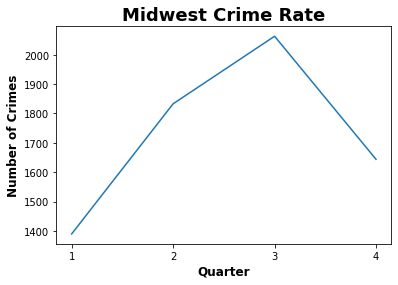

In [145]:
plt.plot(MW["index"], MW["Quarter"])
plt.xticks(np.arange(1,5, 1))
plt.xlabel("Quarter", fontsize = 12, fontweight="bold")
plt.ylabel("Number of Crimes",fontsize = 12, fontweight="bold")
plt.title("Midwest Crime Rate", fontsize = 18, fontweight = "bold")

# Other

In [146]:
other = year_filter[(year_filter["REGION_NAME"]=="Other")]
other_data = other["Quarter"].value_counts()
other_data = pd.DataFrame(other_data)
O = other_data.reset_index()
O =  O.sort_values(by = "index")

Text(0.5, 1.0, 'Other Areas Crime Rate')

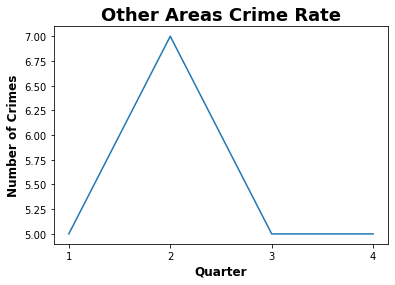

In [147]:
plt.plot(O["index"], O["Quarter"])
plt.xticks(np.arange(1,5, 1))
plt.xlabel("Quarter", fontsize = 12, fontweight="bold")
plt.ylabel("Number of Crimes",fontsize = 12, fontweight="bold")
plt.title("Other Areas Crime Rate", fontsize = 18, fontweight = "bold")